In [1]:
library(dplyr)
library(repr)
library(tidyverse)
library(tidymodels)
library(GGally)

Warning message:
“package ‘dplyr’ was built under R version 4.0.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ stringr 1.4.0
✔ tidyr   1.1.2     ✔ forcats 0.5.0
✔ readr   1.3.1     

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ b

In [2]:
algerian_fire_0 <- read.csv(url("https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv"), skip = 1)
algerian_fire <- algerian_fire_0 %>% #set up right labels 
     select(day, month, year, Classes,Temperature, RH, Ws, Rain) %>%
    mutate(Temperature = as.numeric(Temperature)) %>%
    mutate(RH = as.numeric(RH)) %>%
    mutate(Ws = as.numeric(Ws)) %>%
    mutate(Rain = as.numeric(Rain)) 
algerian_fire$date <- as.Date(with(algerian_fire, paste(year, month, day, sep="-")), "%Y-%m-%d") #combine three columns and set it as date
tidy_al <- algerian_fire %>% select(date, Classes,Temperature, RH, Ws, Rain) #tidy data for the whole dataset

Warning message:
“Problem with `mutate()` input `Temperature`.
ℹ NAs introduced by coercion
ℹ Input `Temperature` is `as.numeric(Temperature)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `RH`.
ℹ NAs introduced by coercion
ℹ Input `RH` is `as.numeric(RH)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `Ws`.
ℹ NAs introduced by coercion
ℹ Input `Ws` is `as.numeric(Ws)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `Rain`.
ℹ NAs introduced by coercion
ℹ Input `Rain` is `as.numeric(Rain)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


In [3]:
bejaia_fire <- tidy_al[c(1:122),] #select data for bejaia region
bejaia_fire$Classes <- trimws(bejaia_fire$Classes) #remove space before and after the string
bejaia_fire <- bejaia_fire %>% mutate(Classes = as.factor(Classes)) #set the label back to factor
bejaia_split <- initial_split(bejaia_fire, prop = 0.8, strata = Classes)
bejaia_train <- training(bejaia_split) #split and get training dataset
Mean <- "Mean"
b_t <- mean(bejaia_train$Temperature)
b_RH <- mean(bejaia_train$RH)
b_Ws <- mean(bejaia_train$Ws)
b_R <- mean(bejaia_train$Rain)
tibble(Mean, "Temperature" = b_t, "Relative Humidity"=b_RH, "Wind spead"=b_Ws, "Rain"=b_R) #creat table for mean

Mean,Temperature,Relative Humidity,Wind spead,Rain
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Mean,31.35354,67.77778,15.9899,0.8020202


In [4]:
summary(with(bejaia_train, Classes=="fire"))
nrow(bejaia_train)

   Mode   FALSE    TRUE 
logical      51      48 

[1] 99

In [5]:
tibble("Number of obervations"=99, "Fire"=51, "Not Fire"=48 ) #create table for number of observations for each classes

Number of obervations,Fire,Not Fire
<dbl>,<dbl>,<dbl>
99,51,48


In [6]:
#options(repr.plot.width = 10, repr.plot.height = 10)
#pairs_bejaia <- bejaia_train %>%
#  select(Temperature, RH, Ws, Rain) %>%
#  ggpairs(ggplot2::aes(colour=bejaia_train$Classes)) + labs("color = bejaia_train$Classes")
#pairs_bejaia

In [7]:
bejaia_recipe <- recipe(Temperature~RH+Ws+Rain, data=bejaia_train) %>% #scale the data
    step_center(all_predictors()) %>%
    step_scale(all_predictors())
bejaia_scaled <- bejaia_recipe %>%  
    prep() %>%
    bake(bejaia_train)

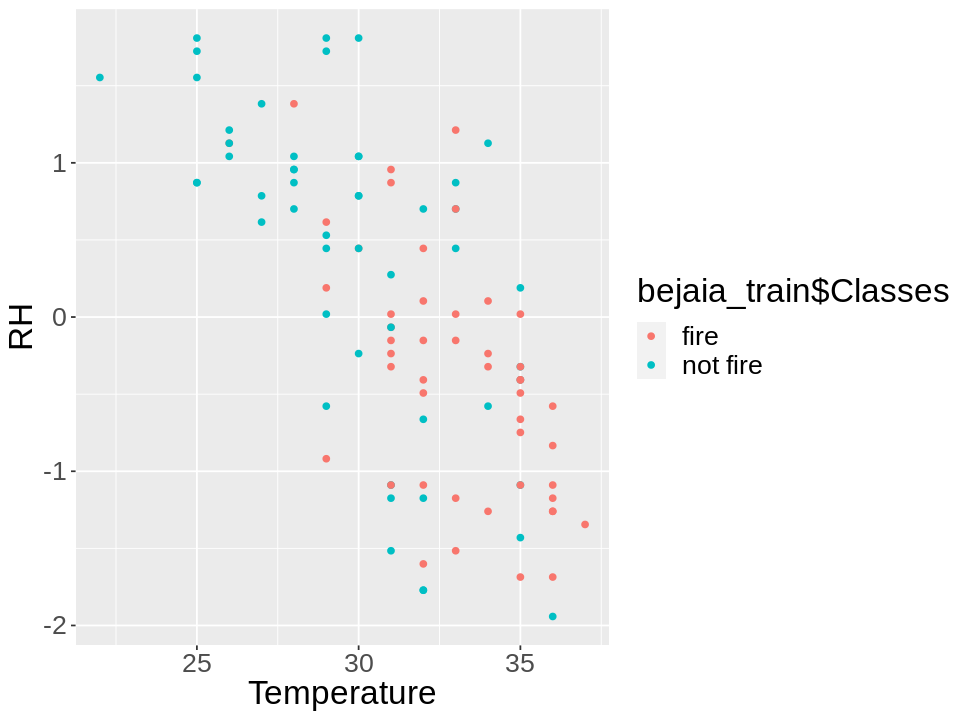

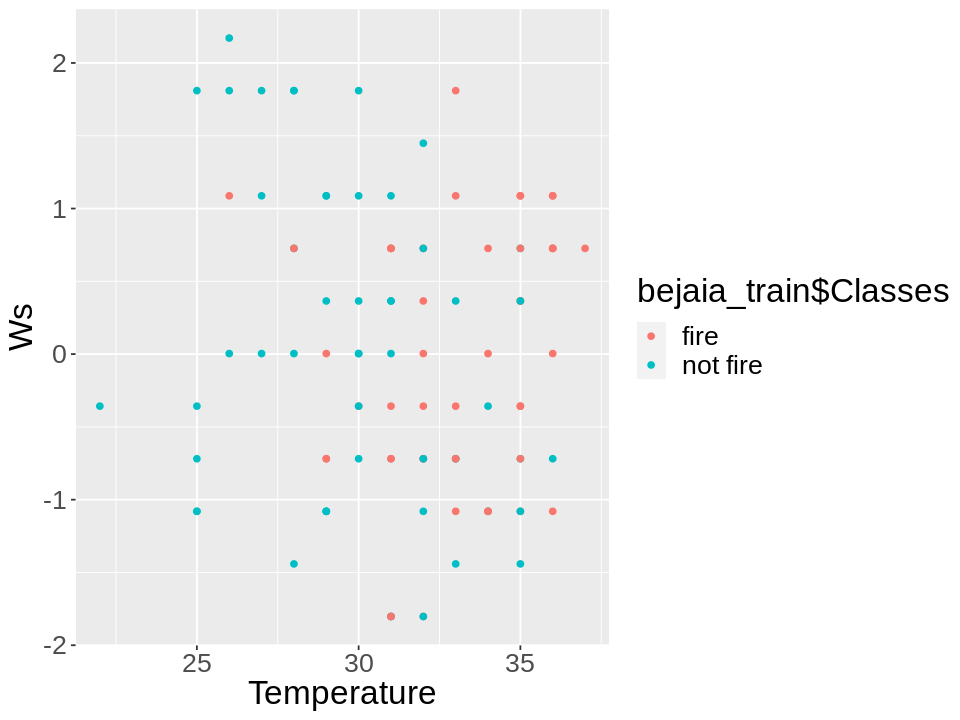

In [8]:
options(repr.plot.width = 8, repr.plot.height = 6)
b_RH_plot <- bejaia_scaled %>% 
    ggplot(aes(x=Temperature,y=RH, color=bejaia_train$Classes)) + 
    geom_point() + 
    labs("colour = Classes")+
    theme(text = element_text(size = 20))
b_Ws_plot <- bejaia_scaled %>% 
    ggplot(aes(x=Temperature, y=Ws, color=bejaia_train$Classes)) + 
    geom_point() + 
    labs("colour = Classes") +
    theme(text = element_text(size = 20))
b_RH_plot 
b_Ws_plot

In [9]:
sidi_fire <- tidy_al[c(125:246),] # select data for sidi region
sidi_fire$Classes <- trimws(sidi_fire$Classes) #remove space before and after the string
sidi_fire <- sidi_fire %>% mutate(Classes = as.factor(Classes)) #set the label back to factor
sidi_split <- initial_split(sidi_fire, prop = 0.80, strata = Classes)
sidi_train <- training(sidi_split) 
Mean <- "Mean"
s_t <- mean(sidi_train$Temperature)
s_RH <- mean(sidi_train$RH)
s_Ws <- mean(sidi_train$Ws)
s_R <- mean(sidi_train$Rain)
tibble(Mean, "Temperature" = s_t, "Relative Humidity"=s_RH, "Wind spead"=s_Ws, "Rain"=s_R)

Mean,Temperature,Relative Humidity,Wind spead,Rain
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Mean,33.0202,56.78788,15.05051,0.7545455


In [10]:
summary(with(sidi_train, Classes=="fire"))
nrow(sidi_train)

   Mode   FALSE    TRUE 
logical      36      63 

[1] 99

In [11]:
tibble("Number of obervations"=99, "Fire"=36, "Not Fire"=63 ) #create table for number of observations for each classes

Number of obervations,Fire,Not Fire
<dbl>,<dbl>,<dbl>
99,36,63


In [12]:
sidi_recipe <- recipe(Temperature~RH+Ws+Rain, data=sidi_train) %>% #scale the data
    step_center(all_predictors()) %>%
    step_scale(all_predictors())
sidi_scaled <- sidi_recipe %>%  
    prep() %>%
    bake(sidi_train)

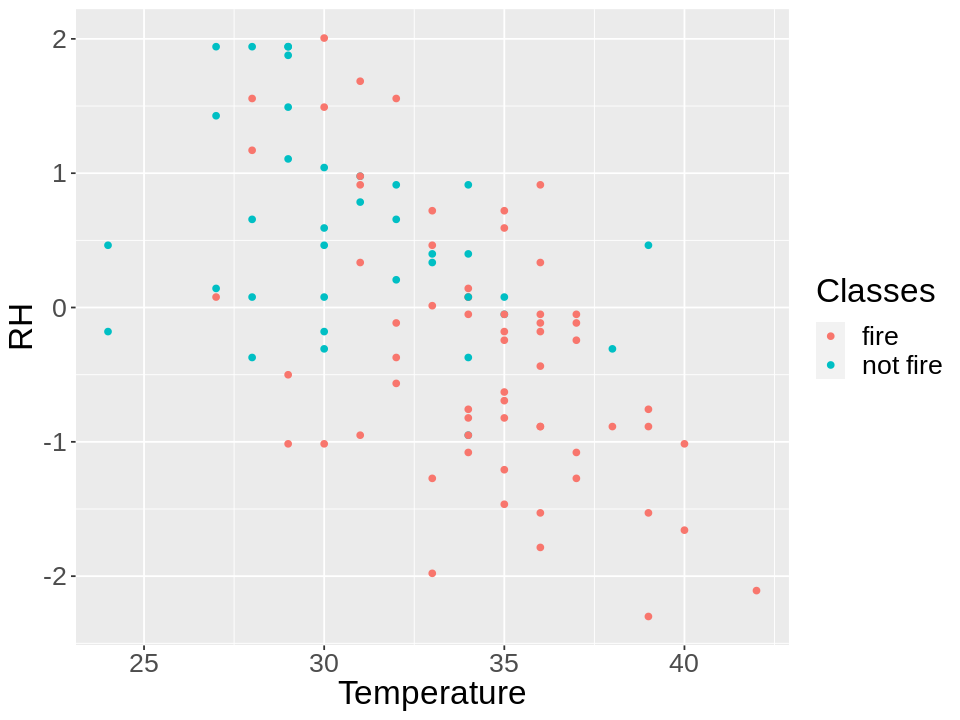

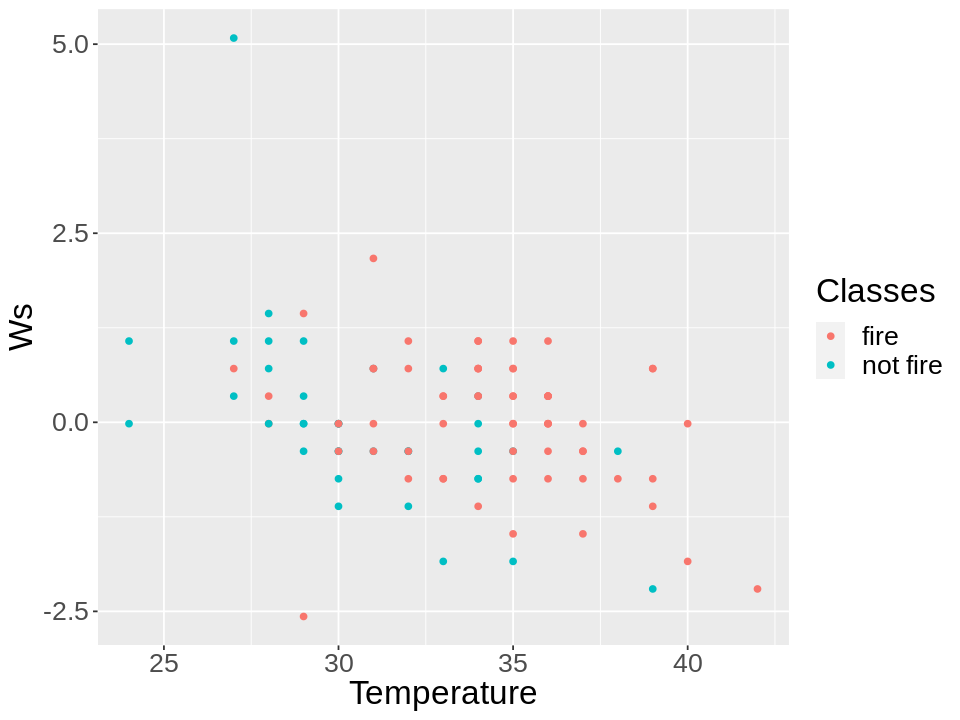

In [15]:
options(repr.plot.width = 8, repr.plot.height = 6)
s_RH_plot <- sidi_scaled %>% 
    ggplot(aes(x=Temperature,y=RH, color=sidi_train$Classes)) + 
    geom_point() + 
    labs(colour = "Classes")+
    theme(text = element_text(size = 20))
s_Ws_plot <- sidi_scaled %>% 
    ggplot(aes(x=Temperature, y=Ws, color=sidi_train$Classes)) + 
    geom_point() + 
    labs(colour = "Classes") +
    theme(text = element_text(size = 20))
s_RH_plot 
s_Ws_plot